In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Supplementary material</h1>
<h2 style="text-align: center;">Using LINK as relational model</h2>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from org.gesis.inference.inference import get_inference_summary_fn
from utils import viz
from utils import io
from utils import prediction
from utils import estimator
from utils import empirical

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "LINK"                      # relational model
CI = "relaxationlink"               # inference
MODEL = "BAH"                   # main network model
x = 5                           # number of networks same type
EPOCHS = 10                     # number of times relational classification is done in 1 network
SMALLP = 0.3                    # pseeds <= small p (SMALL SAMPLES)
DATAPATH = "../data/"           # directory to store networks (gpickle)
OUTPUT = "../results-link/"    # directory to store results
OUTPUT_PLOTS = os.path.join(OUTPUT, 'plots')
OUTPUT_SUMMARY = get_inference_summary_fn(OUTPUT, kind, LC, RC, CI, sampling)
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = io.load_csv(OUTPUT_SUMMARY)
df_results_original.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp10,EEcp11,EEcp01,SEp0,SEp1,SEcp00,SEcp11,SEcpDiff,SEcpSum,SE
0,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3,...,NaN,NaN,NaN,3.354310e-05,3.354310e-05,NaN,NaN,NaN,NaN,NaN
1,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3,...,NaN,NaN,NaN,2.531448e-04,2.531448e-04,NaN,NaN,NaN,NaN,NaN
2,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3,...,NaN,NaN,NaN,3.330610e-07,3.330610e-07,NaN,NaN,NaN,NaN,NaN
3,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3,...,NaN,NaN,NaN,4.405099e-05,4.405099e-05,NaN,NaN,NaN,NaN,NaN
4,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3,...,NaN,NaN,NaN,4.231382e-05,4.231382e-05,NaN,NaN,NaN,NaN,NaN


<h2>Plotting setup</h2>

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.shape

(16500, 49)

<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [6]:
sampling = 'nodes'
df_rq1 = df_results.query("kind==@MODEL and dataset=='-' & sampling==@sampling")
df_rq1.shape

(16500, 49)

<h3>1.1. Network structure vs. Global performance</h3>

../results-link/plots/R1_ROCAUC_H_nodes_N2000_x5_RUNS10_LINK.pdf saved!


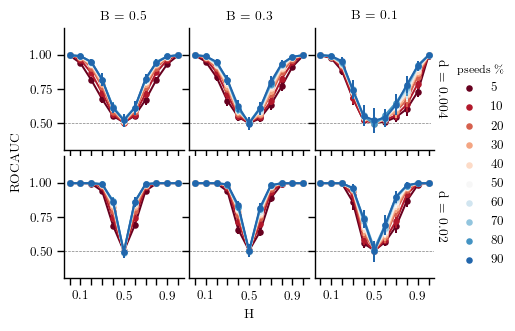

In [7]:
N = 2000
sampling = 'nodes'

fn = os.path.join(OUTPUT_PLOTS, 'R1_ROCAUC_H_{}_N{}_x{}_RUNS{}_LINK.pdf'.format(sampling, N, x, EPOCHS))
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==@N"), columns, fn=fn)

../results-link/plots/SM_R1.pdf saved!


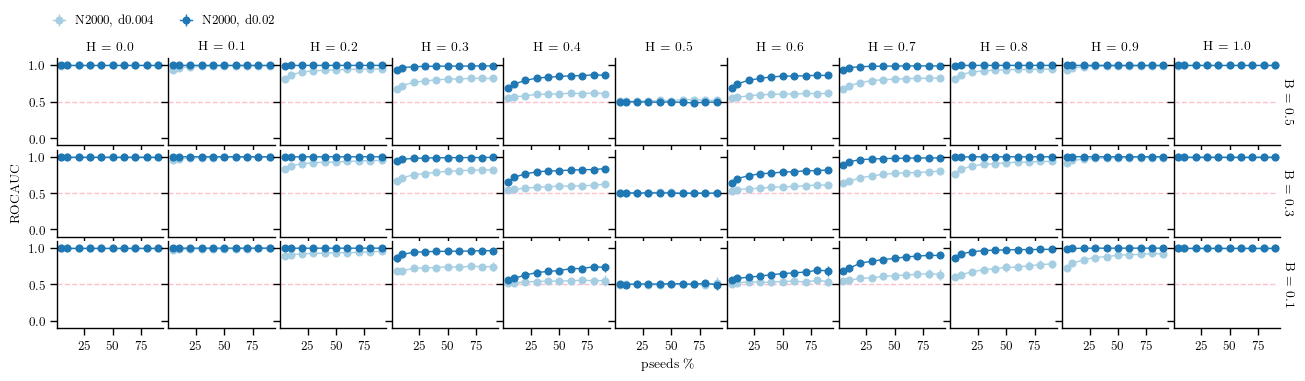

In [8]:
fn = os.path.join(OUTPUT_PLOTS, 'SM_R1.pdf')
viz.plot_rocauc_vs_pseeds_per_H_B_N_m(df_rq1, columns, fn=fn)

<div style="text-align:center;"><h2>RQ3: Fairness</h2></div>

In [9]:
N = 2000
m = 4
H = [0.2, 0.5, 0.8]

df_rq3 = df_results.query("kind==@MODEL & N==@N & m==@m & H in @H & pseeds <= @SMALLP & sampling != 'neighbors'")
df_rq3.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
609,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3,...,NaN,NaN,NaN,0.000057,0.000057,NaN,NaN,NaN,NaN,NaN
612,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3,...,NaN,NaN,NaN,0.000483,0.000483,NaN,NaN,NaN,NaN,NaN
614,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3,...,NaN,NaN,NaN,0.000040,0.000040,NaN,NaN,NaN,NaN,NaN
615,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3,...,NaN,NaN,NaN,0.000197,0.000197,NaN,NaN,NaN,NaN,NaN
617,BAH,-,2000,4,0.003994,0.1,0.2,0.2,0.2,3,...,NaN,NaN,NaN,0.000072,0.000072,NaN,NaN,NaN,NaN,NaN


<h3>Performance Bias</h3>

../results-link/plots/R3_BIAS_bars_leqP30.pdf saved!


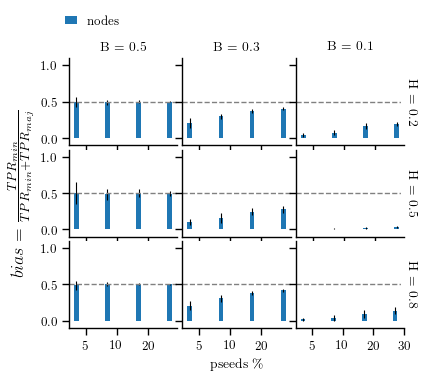

In [10]:
fn = os.path.join(OUTPUT_PLOTS, 'R3_BIAS_bars_leqP{}.pdf'.format(int(100*SMALLP)))
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)

In [11]:
df_rq3.groupby(['sampling','H'])['ROCAUC'].mean()

sampling  H  
nodes     0.2    0.891117
          0.5    0.501867
          0.8    0.791714
Name: ROCAUC, dtype: float64